In [313]:
import pandas as pd
import numpy as np
iris_dataset_path='https://raw.githubusercontent.com/CCube-Club/Recruitment-2023/main/AI-ML%20Corner/Iris%20Recogniser-CCube-Medium/IRIS.csv'
iris_data=pd.read_csv(iris_dataset_path)

#choosing "Features"
iris_data_features=['sepal_length','sepal_width','petal_length','petal_width']
X=iris_data[iris_data_features]

#prediction target
y=iris_data.species

#Describing the data to predcit the Species
X.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [356]:
from sklearn.preprocessing import LabelBinarizer


# Using LabelBinarizer
binarizer = LabelBinarizer()
binary_encoded = binarizer.fit_transform(y)
classes = binarizer.classes_

print("Binary Encoded Data:")
print(binary_encoded)
print("Classes:")
print(classes)



Binary Encoded Data:
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1

In [314]:
from sklearn.tree import DecisionTreeRegressor

#Define the Iris model
#Random_state ensures that you get the same results in each run.
iris_recogniser_model=DecisionTreeRegressor(random_state=1)

#Fit the model
iris_recogniser_model.fit(X,binary_encoded)

DecisionTreeRegressor(random_state=1)

In [317]:
print("Making predictions for the following 5 entries:")
print(X.head())
print("The predictions are:")
print(iris_recogniser_model.predict(X.head()))

Making predictions for the following 5 entries:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
The predictions are:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [318]:
# To calculate the mean absolute error or MAE:

from sklearn.metrics import mean_absolute_error

predicted_flower=iris_recogniser_model.predict(X)
mean_absolute_error(binary_encoded,predicted_flower)

0.0

In [326]:
from sklearn.model_selection import train_test_split

#split the data into training and validation data
train_X,val_X,train_binary_encoded,val_binary_encoded=train_test_split(X,binary_encoded,random_state=0)

#Define the iris recogniser model
iris_recogniser_model=DecisionTreeRegressor()

#Fit the Model
iris_recogniser_model.fit(train_X,train_binary_encoded)

#Get predicted flower species on validation data
iris_val_predictions = iris_recogniser_model.predict(val_X)
print(mean_absolute_error(val_binary_encoded,iris_val_predictions))

iris_val_mae = mean_absolute_error(iris_val_predictions,val_binary_encoded)
print("Validation MAE for Iris Recogniser Model: {:,.0f}".format(iris_val_mae))

0.017543859649122806
Validation MAE for Iris Recogniser Model: 0


In [285]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_binary_encoded, val_binary_encoded)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0
Max leaf nodes: 50  		 Mean Absolute Error:  0
Max leaf nodes: 500  		 Mean Absolute Error:  0
Max leaf nodes: 5000  		 Mean Absolute Error:  0


In [347]:
#Using the k-nearest neighbors algorithm to check the accuracy of the Iris model
from sklearn.neighbors import KNeighborsClassifier

# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(train_X,train_binary_encoded)
y_pred = knn.predict(val_X)
 
# compute accuracy of the model
print('The accurcy score of the Iris model:',knn.score(val_X,val_binary_encoded))


The accurcy score of the Iris model: 0.9736842105263158


<Axes: xlabel='sepal_length', ylabel='petal_length'>

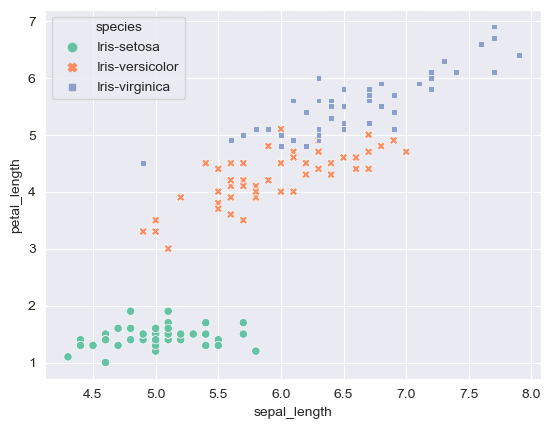

In [366]:
# Adding a Scatter PLot

import seaborn as sns
sns.scatterplot(x='sepal_length', y='petal_length', data=iris_data,style='species',hue='species')

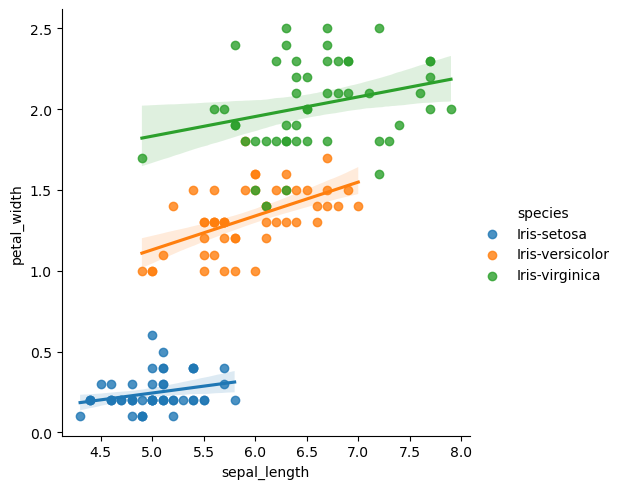

In [188]:
# Adding a Regression Line to a Seaborn Scatter Plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(data=iris_data, x='sepal_length', y='petal_width',hue='species')
plt.show()

<Axes: ylabel='sepal_length'>

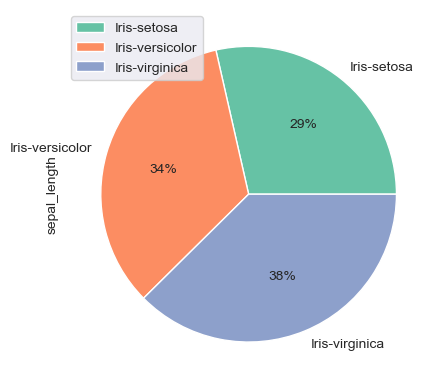

In [290]:
# Plotting the pie chart for above dataframe
iris_data.groupby(['species']).sum().plot(kind='pie', y='sepal_length', autopct='%1.0f%%')

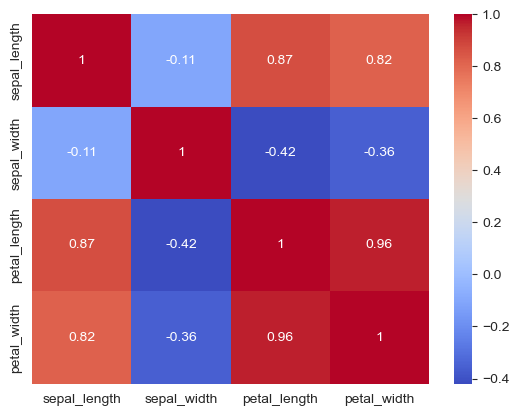

In [365]:
# Generate a heatmap using seaborn
import seaborn as sns

#Create a Sample data frame
df=pd.DataFrame(X)

#Create a correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()
